# About Flight price Prediction<br>
We all know that flight travel has become an important part of our life, it is the fastest way of travelling. People often see that flight fare fluctuates freqently.we also observed that if we book our ticket a week before the flight,we get some relief in the price. we will try to build a prediction model which can predict the flight fare basis the given dataset.<br>

**Dataset**

We have training and test file sepratelly available with us. training set has 10683 rows and 11 colunms including Target feature. Test set has 2671 rows and 10 colmns. All the columns are categorical except target columns. so we have to process all the columns and convert them into numeric one for the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
flight_train_data = pd.read_excel("Data_Train.xlsx")
flight_test_data  = pd.read_excel("Test_set.xlsx")

In [3]:
Test_data = flight_test_data.copy()

In [4]:
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
flight_test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
flight_test_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [8]:
flight_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
flight_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We have flight dataset which has information like date of flight, source, destination, duration , arrival time, departure time and any other along with Target feature, we have same features in test dataset also apart from target column.<br>
it has 11 columns with Target feature and are all object type in nature except price feature which is our target variable.
i have observed some  missing values also in training dataset. we will check further.

# Checking missing value

In [10]:
def missing_val(x):
    missing_value = {}
    for i in x.columns:
        if x[i].isnull().sum() > 0:
            missing_value[i] = x[i].isnull().sum()
    print(missing_value)
            

In [11]:
missing_val(flight_train_data)

{'Route': 1, 'Total_Stops': 1}


In [12]:
missing_val(flight_test_data)

{}


We have missing value in training dataset that to in route and total_stops, we will drop it as we have only one 2 instances out of 10K dataset

In [13]:
flight_train_data.dropna(inplace = True)

In [14]:
missing_val(flight_train_data)

{}


In [15]:
flight_train_data.shape

(10682, 11)

it was 10683, only one observation dropped.

In [16]:
# check the object type columns values

obj_col = flight_train_data.select_dtypes(include= "object")
def check_value(x):
    for i in x.columns:
        print(x[i].value_counts(),"\n")
  

In [17]:
check_value(obj_col)

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    15

1. we have multiple airlines data, top 3 airlines names are Jet Airways, IndiGO and air india.
2. Date column has to be converted into datetime columns
3. source of the flights are from major 4 cities and their destination is also to major cities
4. Route tells whether flight are connecting or direct flight
5. Arrival time columns as multiple observations , it has hours, minutes and months also alogn wtih dates
6. Duration is only hours are minute
7. Tota stops, tells that how any stop a flight takes<br><br>

will clean all the data points one by one



# Feature Engeenering

# Creating a feature by seprating Date, month and year 

In [18]:
#Change the datatypes of Date columns

flight_train_data["Date_of_Journey"] = pd.to_datetime(flight_train_data["Date_of_Journey"])
flight_test_data["Date_of_Journey"] = pd.to_datetime(flight_test_data["Date_of_Journey"])

# Training Data
flight_train_data["Day"]  = flight_train_data["Date_of_Journey"].dt.day
flight_train_data["Month"]  = flight_train_data["Date_of_Journey"].dt.month
flight_train_data["Year"]  = flight_train_data["Date_of_Journey"].dt.year

flight_train_data.drop("Date_of_Journey", axis = 1, inplace = True)
# Test data

flight_test_data["Day"]  = flight_test_data["Date_of_Journey"].dt.day
flight_test_data["Month"]  = flight_test_data["Date_of_Journey"].dt.month
flight_test_data["Year"]  = flight_test_data["Date_of_Journey"].dt.year

flight_test_data.drop("Date_of_Journey", axis = 1, inplace = True)

Have extracted the date , month and year for EDA analysis and at the time to modeling it will get dropped

In [19]:
# seprating route and saving it in outhes columns

# Training Data 

flight_train_data["First_route"] =  flight_train_data["Route"].str.split("→ ").str[0] 
flight_train_data["Seond_route"] =  flight_train_data["Route"].str.split("→ ").str[1]
flight_train_data["third_route"] =  flight_train_data["Route"].str.split("→ ").str[2]
flight_train_data["forth_route"] =  flight_train_data["Route"].str.split("→ ").str[3]
flight_train_data.drop("Route",axis =1, inplace= True)

# Testing Data

flight_test_data["First_route"] =  flight_test_data["Route"].str.split("→ ").str[0] 
flight_test_data["Seond_route"] =  flight_test_data["Route"].str.split("→ ").str[1]
flight_test_data["third_route"] =  flight_test_data["Route"].str.split("→ ").str[2]
flight_test_data["forth_route"] =  flight_test_data["Route"].str.split("→ ").str[3]
flight_test_data.drop("Route",axis =1, inplace= True)

we have multiple routes and those are seprated by arrow and we are seprating them and saving into different columns. 

In [20]:
# seprating Dept_time into hours and min

# Training data

flight_train_data["Dep_Time_hours"] = flight_train_data["Dep_Time"].str.split(":").str[0]
flight_train_data["Dep_Time_Min"] = flight_train_data["Dep_Time"].str.split(":").str[1]
 
flight_train_data.drop("Dep_Time",axis = 1, inplace = True)    

# Test Data

flight_test_data["Dep_Time_hours"] = flight_test_data["Dep_Time"].str.split(":").str[0]
flight_test_data["Dep_Time_Min"] = flight_test_data["Dep_Time"].str.split(":").str[1]

flight_test_data.drop("Dep_Time",axis = 1, inplace = True)

seprating departure hours and min and saving them into different columns

In [21]:
# Dividing Arrival time, i wont take date and month from this column into considering because it not available for all the observations

# Training Data
flight_train_data["Arrival_Time"] = flight_train_data["Arrival_Time"].str.split(" ").str[0] # seprate hour and date month
flight_train_data["Arrival_Time_hours"] = flight_train_data["Arrival_Time"].str.split(":").str[0]
flight_train_data["Arrival_Time_min"] = flight_train_data["Arrival_Time"].str.split(":").str[1]
flight_train_data.drop("Arrival_Time",axis = 1, inplace = True)

# Test data

flight_test_data["Arrival_Time"] = flight_test_data["Arrival_Time"].str.split(" ").str[0] # seprate hour and date month
flight_test_data["Arrival_Time_hours"] = flight_test_data["Arrival_Time"].str.split(":").str[0]
flight_test_data["Arrival_Time_min"] = flight_test_data["Arrival_Time"].str.split(":").str[1]
flight_test_data.drop("Arrival_Time",axis = 1, inplace = True)


seprating Arrivaltime into hours and min and saving them into different columns

In [22]:
duration = list(flight_train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
             duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))
    
    
test_duration = list(flight_test_data["Duration"])
for i in range(len(test_duration)):
    if len(test_duration[i].split()) !=2:
        if "h" in test_duration[i]:
             test_duration[i] = test_duration[i].strip() + " 0m" 
        else:
            test_duration[i] = "0h " + test_duration[i]
test_duration_hours = []
test_duration_mins = []

for i in range(len(test_duration)):
    test_duration_hours.append(int(test_duration[i].split("h")[0]))
    test_duration_mins.append(int(test_duration[i].split("m")[0].split()[-1]))

Extracting the hours and min from the duration

In [23]:
# Training data
flight_train_data["Duration_hours"] = duration_hours
flight_train_data["Duration_Min"] = duration_mins
flight_train_data.drop("Duration",axis = 1,inplace = True)

# test data
flight_test_data["Duration_hours"] = test_duration_hours
flight_test_data["Duration_Min"] = test_duration_mins
flight_test_data.drop("Duration",axis = 1,inplace = True)

In [24]:
# extracting the the stop details 
# Training Data
flight_train_data["Total_Stops"].replace("non-stop","0 stop",inplace = True)
flight_train_data["Total_Stops"] =  flight_train_data["Total_Stops"].str.split(" ").str[0] 

# Test data
flight_test_data["Total_Stops"].replace("non-stop","0 stop",inplace = True)
flight_test_data["Total_Stops"] =  flight_test_data["Total_Stops"].str.split(" ").str[0] 

remove the stop string from the Total_stop columns 

In [25]:
flight_train_data["Price"].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Price is Right skewed and max price is 79512

# EDA

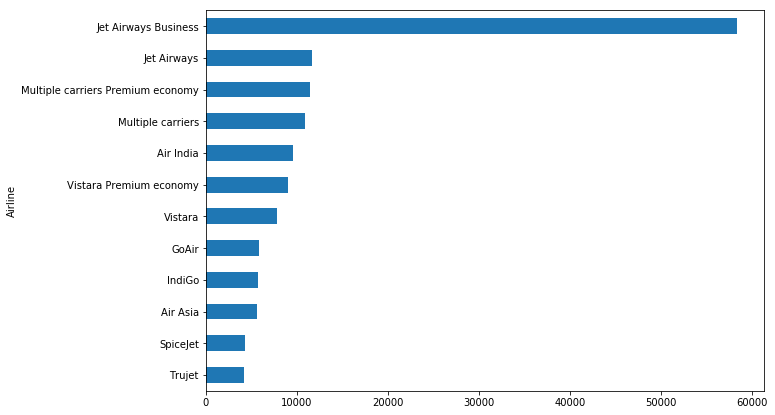

In [26]:
plt.figure(figsize =(10,7))
flight_train_data.groupby("Airline")["Price"].mean().sort_values(ascending= True).plot(kind = "barh")

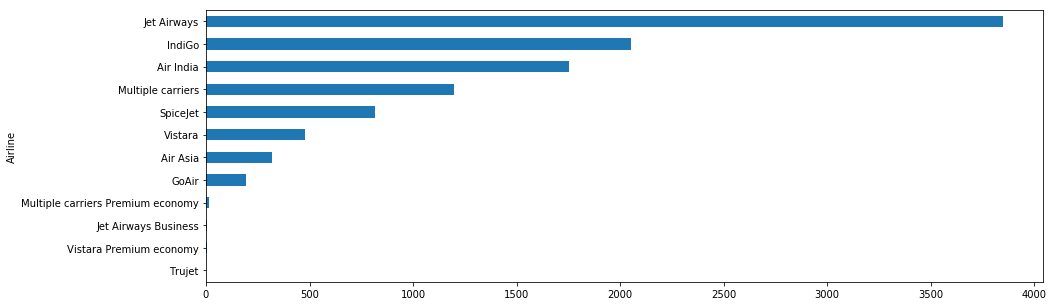

In [27]:
plt.figure(figsize = (15,5))
flight_train_data.groupby("Airline")["Airline"].count().sort_values(ascending = True).plot(kind = "barh");

1. Business class Average price for Jet Airways is way high to high
2. Jet Airways, carriers premium economy ,Multiple Carriers, AirIndia and Vistara premium economy's price are high after Jet airways business class 
3. maxium flight are jet Airways which has been capture in the data followed by Indigo and Air india, jet Airways would have maximum flight availability that is the reason people chosen  this

In [28]:
flight_train_data[flight_train_data["Airline"] =="Jet Airways Business"]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,First_route,Seond_route,third_route,forth_route,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,3,1,2019,BLR,BOM,DEL,NaN,05,45,10,45,5,0
2924,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,3,1,2019,BLR,BOM,DEL,NaN,05,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,3,1,2019,BLR,BOM,DEL,NaN,05,45,12,25,6,40
7351,Jet Airways Business,Delhi,Cochin,2,No info,46490,3,3,2019,DEL,ATQ,BOM,COK,20,05,04,25,8,20
9715,Jet Airways Business,Delhi,Cochin,2,No info,52285,3,6,2019,DEL,ATQ,BOM,COK,20,05,04,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,3,1,2019,BLR,MAA,DEL,NaN,09,45,14,25,4,40


There are 6 flight taken off from bangalore and delhi with business classs and average price is 60000 as we seen above

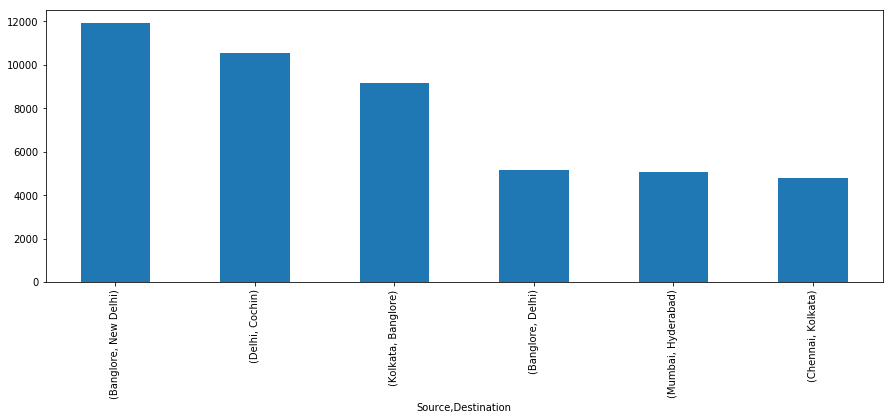

In [29]:
plt.figure(figsize =(15,5))
flight_train_data.groupby(["Source","Destination"])["Price"].mean().sort_values(ascending= False).plot(kind = "bar")

Bangalore to New_Delhi average price is 12000 approx, Delhi to Cochin average price is 10500 approx 

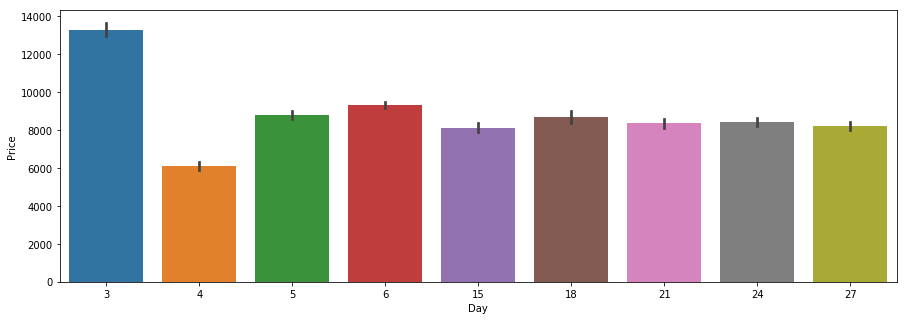

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Day", y = "Price", data = flight_train_data)

In [31]:
pd.pivot_table(flight_train_data, values = "Price",index ="Source", aggfunc="mean", columns = "Month" )

Month,1,3,4,5,6,9,12
Source,,,,,,,
Banglore,14225.078292,7809.777236,5148.201923,4803.541667,7840.174118,6593.072072,8304.269565
Chennai,5585.184211,4704.951456,NaN,4384.078125,4699.682243,4883.333333,5140.166667
Delhi,10709.438356,10176.883625,6126.155963,10702.897679,10750.217018,11190.991241,10200.360000
Kolkata,9092.089286,8344.732733,4479.514019,10177.647453,8582.591356,9575.911548,9583.748011
Mumbai,5261.833333,3698.661376,NaN,3578.570000,6512.507042,4000.679245,7023.728571


3rd of every month price are extremly high in all the months. There might be reason that people would have tarvelled to their corporates office for monthly meeting. 

In [32]:
pd.pivot_table(flight_train_data, values = "Price",index =["Source","Destination"], aggfunc="mean", columns = "Day" )

Day                             3            4             5             6   \
Source   Destination                                                          
Banglore Delhi                 NaN  5091.176744   4995.629808   5438.763889   
         New Delhi    14493.081181          NaN           NaN           NaN   
Chennai  Kolkata       7252.538462          NaN   4372.522388   4450.476923   
Delhi    Cochin       14216.060391  6550.446970  11173.741379  10481.231412   
Kolkata  Banglore      5208.716216  7119.089219  10036.759669   9819.789474   
Mumbai   Hyderabad    11322.500000  3450.307692   3663.098039   3662.020202   

Day                            15            18           21            24  \
Source   Destination                                                         
Banglore Delhi        5094.047619   5262.204918  5255.786885   4986.380165   
         New Delhi    8644.922330  12121.294737  6922.709677   5720.202020   
Chennai  Kolkata      5009.358974   4340.307692  3963.027027   4571.736842   
Delhi    Cochin       9569.119332  10719.696296  9842.086081   9750.591640   
Kolkata  Banglore     8659.063025   8967.514894  9015.367347  10107.777512   
Mumbai   Hyderabad    3386.542373   3525.084507  3891.352941   3620.846154   

Day                            27  
Source   Destination               
Banglore Delhi        4964.392593  
         New Delhi            NaN  
Chennai  Kolkata      4104.136364  
Delhi    Cochin       9709.459158  
Kolkata  Banglore     4313.253165  
Mumbai   Hyderabad    3654.687500

1. Bangalore to Delhi price is almost same for all days and it is between 5400 to 4964.
2. Bagalore to New delhi price are high,
3. 3rd of every month price are very high except KOL

In [33]:
pd.pivot_table(flight_train_data, values = "Duration_hours", index = "Airline", columns = "Day", aggfunc = "count")

Day,3,4,5,6,15,18,21,24,27
Airline,,,,,,,,,
Air Asia,28.0,26.0,43.0,60.0,33.0,28.0,31.0,37.0,33.0
Air India,302.0,103.0,235.0,324.0,167.0,134.0,178.0,166.0,142.0
GoAir,21.0,22.0,22.0,34.0,23.0,12.0,12.0,28.0,20.0
IndiGo,289.0,160.0,233.0,346.0,218.0,159.0,206.0,204.0,238.0
Jet Airways,416.0,207.0,600.0,885.0,285.0,320.0,405.0,376.0,355.0
Jet Airways Business,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multiple carriers,173.0,14.0,71.0,307.0,132.0,63.0,138.0,73.0,225.0
Multiple carriers Premium economy,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
SpiceJet,63.0,80.0,108.0,125.0,87.0,79.0,89.0,100.0,87.0


it is obvious that Jet Airway has maxium flight and its duration also would be high but Air india comes at 3rd place intems of flihgt take off count but the average is high as compared to Indigo, which mean it has maximum stops

In [34]:
flight_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10682 non-null  object
 1   Source              10682 non-null  object
 2   Destination         10682 non-null  object
 3   Total_Stops         10682 non-null  object
 4   Additional_Info     10682 non-null  object
 5   Price               10682 non-null  int64 
 6   Day                 10682 non-null  int64 
 7   Month               10682 non-null  int64 
 8   Year                10682 non-null  int64 
 9   First_route         10682 non-null  object
 10  Seond_route         10682 non-null  object
 11  third_route         7191 non-null   object
 12  forth_route         1566 non-null   object
 13  Dep_Time_hours      10682 non-null  object
 14  Dep_Time_Min        10682 non-null  object
 15  Arrival_Time_hours  10682 non-null  object
 16  Arrival_Time_min    10

We have missing values in third route and forth route, which mean that maximum flight are direct and thus they have only from and To destination. we cannot fill.

In [35]:
flight_train_data.drop(columns = ["First_route","Seond_route","third_route","forth_route"],axis =1, inplace = True)
flight_test_data.drop(columns = ["First_route","Seond_route","third_route","forth_route"],axis =1, inplace = True)

# Deleting addition information column as well as it is no relevant 

# Training data

flight_train_data.drop("Additional_Info",axis = 1, inplace = True)

# test Data

flight_test_data.drop("Additional_Info",axis = 1, inplace = True)

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# training data

flight_train_data["Airline"] = le.fit_transform(flight_train_data["Airline"])
flight_train_data["Source"] = le.fit_transform(flight_train_data["Source"])
flight_train_data["Destination"] = le.fit_transform(flight_train_data["Destination"])

# Test Data

flight_test_data["Airline"] = le.fit_transform(flight_test_data["Airline"])
flight_test_data["Source"] = le.fit_transform(flight_test_data["Source"])
flight_test_data["Destination"] = le.fit_transform(flight_test_data["Destination"])


In [37]:
flight_train_data.drop(columns = ["Day","Month","Year"],axis = 1, inplace = True)
flight_test_data.drop(columns = ["Day","Month","Year"],axis = 1, inplace = True)

In [38]:
flight_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
0,3,0,5,0,3897,22,20,01,10,2,50
1,1,3,0,2,7662,05,50,13,15,7,25
2,4,2,1,2,13882,09,25,04,25,19,0
3,3,3,0,1,6218,18,05,23,30,5,25
4,3,0,5,1,13302,16,50,21,35,4,45


In [39]:
flight_test_data.head()

,Airline,Source,Destination,Total_Stops,Dep_Time_hours,Dep_Time_Min,Arrival_Time_hours,Arrival_Time_min,Duration_hours,Duration_Min
0,4,2,1,1,17,30,04,25,10,55
1,3,3,0,1,06,20,10,20,4,0
2,4,2,1,1,19,15,19,00,23,45
3,6,2,1,1,08,00,21,00,13,0
4,0,0,2,0,23,55,02,45,2,50


Data is clean now and ready for Modeling, date, month and year are not required for the modeling

In [40]:
flight_train_data.var()

Airline           5.532328e+00
Source            1.385980e+00
Destination       2.175167e+00
Price             2.126638e+07
Duration_hours    7.216359e+01
Duration_Min      2.871607e+02
dtype: float64

In [41]:
flight_test_data.var()

Airline             5.270039
Source              1.402632
Destination         2.154939
Duration_hours     70.403566
Duration_Min      280.483799
dtype: float64

In [42]:
flight_train_data.dtypes

Airline                int32
Source                 int32
Destination            int32
Total_Stops           object
Price                  int64
Dep_Time_hours        object
Dep_Time_Min          object
Arrival_Time_hours    object
Arrival_Time_min      object
Duration_hours         int64
Duration_Min           int64
dtype: object

In [43]:
# Changing the data type
# training data
flight_train_data["Total_Stops"] = flight_train_data["Total_Stops"].astype(int) 
flight_train_data["Dep_Time_hours"] = flight_train_data["Dep_Time_hours"].astype(int) 
flight_train_data["Dep_Time_Min"] = flight_train_data["Dep_Time_Min"].astype(int) 
flight_train_data["Arrival_Time_hours"] = flight_train_data["Arrival_Time_hours"].astype(int) 
flight_train_data["Arrival_Time_min"] = flight_train_data["Arrival_Time_min"].astype(int) 

# Test Data
flight_test_data["Total_Stops"] = flight_test_data["Total_Stops"].astype(int) 
flight_test_data["Dep_Time_hours"] = flight_test_data["Dep_Time_hours"].astype(int) 
flight_test_data["Dep_Time_Min"] = flight_test_data["Dep_Time_Min"].astype(int) 
flight_test_data["Arrival_Time_hours"] = flight_test_data["Arrival_Time_hours"].astype(int) 
flight_test_data["Arrival_Time_min"] = flight_test_data["Arrival_Time_min"].astype(int) 


In [44]:
flight_train_data.dtypes

Airline               int32
Source                int32
Destination           int32
Total_Stops           int32
Price                 int64
Dep_Time_hours        int32
Dep_Time_Min          int32
Arrival_Time_hours    int32
Arrival_Time_min      int32
Duration_hours        int64
Duration_Min          int64
dtype: object

In [45]:
flight_test_data.dtypes

Airline               int32
Source                int32
Destination           int32
Total_Stops           int32
Dep_Time_hours        int32
Dep_Time_Min          int32
Arrival_Time_hours    int32
Arrival_Time_min      int32
Duration_hours        int64
Duration_Min          int64
dtype: object

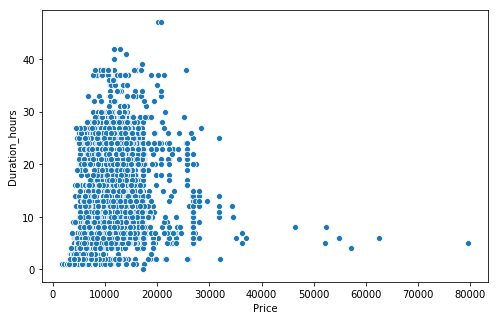

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x ="Price", y = "Duration_hours" , data = flight_train_data)

maximum points are below 20000 and  duration is speard across.

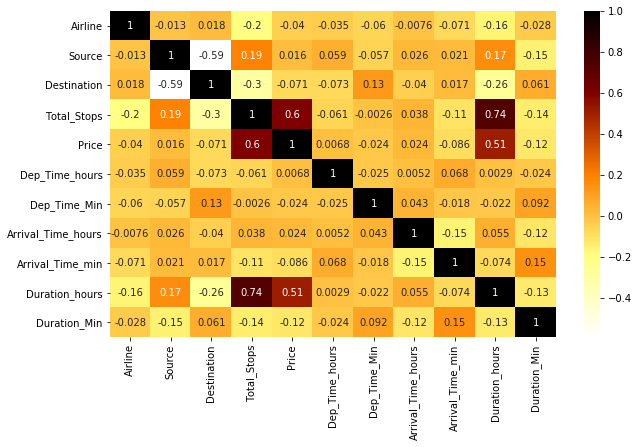

In [47]:
plt.figure(figsize =(10,6))
sns.heatmap(flight_train_data.corr(),annot= True, cmap = "afmhot_r")

Total_stops and Duration_hours have postive correlation with Target colums. Total_stops and Duration hours are also correlation but we will keep the same in the dataset because there are only two which reflect maximum variance 

# Feature selection

In [48]:
# Seprating X & Y
X = flight_train_data.drop("Price",axis =1)
y = flight_train_data["Price"]

In [49]:
from sklearn.feature_selection import f_regression, SelectKBest

In [50]:
select_best = SelectKBest(score_func = f_regression, k = 5)
select_best.fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000023F21C73BF8>)

In [51]:
feature_score = pd.DataFrame(select_best.scores_)
feature_Pvalue = pd.DataFrame(np.round(select_best.pvalues_,4))
feature_name = pd.DataFrame(flight_train_data.drop("Price",axis = 1).columns)

important_feature = pd.concat([feature_name,feature_score,feature_Pvalue], axis =1)
important_feature.columns = ["Feature_name","Feature_score","Pvalue"]
print(important_feature.nlargest(12,columns ="Feature_score"))

         Feature_name  Feature_score  Pvalue
3         Total_Stops    6130.729912  0.0000
8      Duration_hours    3730.131941  0.0000
9        Duration_Min     169.124159  0.0000
7    Arrival_Time_min      79.867692  0.0000
2         Destination      54.298423  0.0000
0             Airline      16.744381  0.0000
5        Dep_Time_Min       6.392435  0.0115
6  Arrival_Time_hours       6.280954  0.0122
1              Source       2.734523  0.0982
4      Dep_Time_hours       0.493755  0.4823


In [52]:
select_X = flight_train_data[["Total_Stops","Duration_hours","Duration_Min","Arrival_Time_min","Destination"]]

In [53]:
select_y = flight_train_data["Price"] 

In [54]:
X_train,X_test,y_train,y_test = train_test_split(select_X,select_y, test_size = 0.25, random_state =100)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
pred = RF.predict(X_test)
print("r2_score", r2_score(y_test, pred))
print("mean_squred_error", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)),"\n")

r2_score 0.5603536155798062
mean_squred_error 9527241.726994263
RMSE 3086.6230296222216 



Tried Selecting best feature for training the model but we have seen that it is as ok as taking all the parameters for training a model. we will trained model with all Dataset in that case

# Model

In [55]:
# Performing Standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)
flight_test = sc.fit_transform(flight_test_data)

In [56]:
for i in range(40,300,60):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state =i)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("r2_score", r2_score(y_test, pred),"Random_state",i)
    print("mean_squred_error", mean_squared_error(y_test, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test, pred)),"\n")

r2_score 0.3793749774086722 Random_state 40
mean_squred_error 14156082.034028748
RMSE 3762.4569145744044 

r2_score 0.3945914623210325 Random_state 100
mean_squred_error 13119347.017172262
RMSE 3622.063916770694 

r2_score 0.36470537335325237 Random_state 160
mean_squred_error 14117778.438372064
RMSE 3757.3632294964596 

r2_score 0.3742753981697716 Random_state 220
mean_squred_error 15239453.803027809
RMSE 3903.7743022654126 

r2_score 0.4102215751933106 Random_state 280
mean_squred_error 12139102.137359459
RMSE 3484.1214297666866 



In [57]:
model = [RandomForestRegressor(n_estimators=100),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(n_estimators=100),AdaBoostRegressor()]

for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.25, random_state =280)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print("r2_score", r2_score(y_test1, pred),i)
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

r2_score 0.6277667809829837 RandomForestRegressor()
mean_squred_error 7661482.47292481
RMSE 2767.9383072830237 

r2_score 0.555524308709175 DecisionTreeRegressor()
mean_squred_error 9148411.65293773
RMSE 3024.6341353852586 

r2_score 0.5580591799285938 KNeighborsRegressor()
mean_squred_error 9096237.718891801
RMSE 3015.9969693107787 

r2_score 0.6408860971452393 GradientBoostingRegressor()
mean_squred_error 7391454.421427114
RMSE 2718.7229394381316 

r2_score 0.4876013676174672 AdaBoostRegressor()
mean_squred_error 10546434.172415862
RMSE 3247.527393635943 



Have checked Multiple Model and their score also. I have found GradiantBoosting working well on the dataset and have given less RMSE score other than that. So i am selecting it for final Model 

# Hyper Parameter Tuning

In [58]:
Gradient_Boost = GradientBoostingRegressor()
Para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

Rand_search = RandomizedSearchCV(Gradient_Boost,Para,cv = 5,scoring = "r2",n_jobs =-1,verbose = 2) 
Rand_search.fit(X_train1,y_train1)
print(Rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


# Cross_val_Score

In [59]:
best_Gradient_Boost = GradientBoostingRegressor(n_estimators= 200, max_depth = 3, learning_rate = 0.1)

for i in range(2,11):
    cross_score = cross_val_score(best_Gradient_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())


2 mean 0.6530394028351274 and STD 0.0037938419415411984
3 mean 0.6595865315388048 and STD 0.010900978912618084
4 mean 0.6639182224616902 and STD 0.015404139482385894
5 mean 0.666988420930972 and STD 0.01824496380958205
6 mean 0.664885034609486 and STD 0.017663141942243756
7 mean 0.6638166849553765 and STD 0.01784176648484776
8 mean 0.666577350358226 and STD 0.022331446950260736
9 mean 0.6666134754511576 and STD 0.021325937752404864
10 mean 0.6661522715195332 and STD 0.02066617034033892


# Saving Model

In [60]:
import pickle
best_Gradient_Boost.fit(X,y)
pred = best_Gradient_Boost.predict(flight_test)

# Saving model

filename = "Flight_price_prediction.pkl"

with open(filename,"wb") as f:
    pickle.dump(best_Gradient_Boost,f)
    

   
# final_submission
pred = pd.Series(pred)

Test_data["Prediction"] = pred
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Prediction
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11499.223109
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4515.434262
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,12476.198560
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10917.780294
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4369.313455


# Conclusion<br>
We have training and test file sepratelly available with us as i mentioned above in the about dataset section. All the predictors are categorical in nature, we process them by spiting into parts and take the required information. Once data has been cleaned both test and training files, Label encoding applied on them to convert them into Numerical one.I have tried selecting best feature by the applying the selectK best algorithm and it has given top 5 features, i trained model on them but it has high bias. I decided to train the Model on entire dataset, training with entire dataset has given some low RMSE, GradientBoosting regressor worked well out of all the models, i have it as final model and have done further procesing   